<a href="https://colab.research.google.com/github/devAquino/Analise-de-dados-com-Python-e-Pandas/blob/main/An%C3%A1lise_de_dados_com_Python_e_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Analizando o dataset AdventureWorks

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("/content/drive/MyDrive/Datasets/AdventureWorks.xlsx")

*Listando apenas as colunas*

In [3]:
df.columns

Index(['Data Venda', 'Data Envio', 'ID Loja', 'ID Produto', 'ID Cliente',
       'No. Venda', 'Custo Unitário', 'Preço Unitário', 'Quantidade',
       'Valor Desconto', 'Valor Venda', 'Produto', 'Fabricante', 'Marca',
       'Classe', 'Cor'],
      dtype='object')

*Renomeando as colunas para que atenda às boas práticas*

In [4]:
df.rename(columns={'Data Venda': 'data_venda', 'Data Envio':'data_envio','ID Loja':'id_loja',
                                    'ID Produto':'id_produto','ID Cliente':'id_cliente', 'No. Venda': 'num_venda',
                                    'Custo Unitário':'custo_unitario', 'Preço Unitário':'preco_unitario',
                                    'Quantidade':'quantidade','Valor Desconto':'valor_desconto', 
                                    'Valor Venda':'valor_venda', 'Produto':'produto', 'Fabricante':'fabricante', 
                                    'Marca':'marca','Classe':'classe', 'Cor':'cor'},inplace=True)

*Verificando se há valores faltantes e outras informações do dataframe*

In [5]:
df.info()
#df.loc[df.data_venda == '2008-05-09']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   data_venda      904 non-null    datetime64[ns]
 1   data_envio      904 non-null    datetime64[ns]
 2   id_loja         904 non-null    int64         
 3   id_produto      904 non-null    int64         
 4   id_cliente      904 non-null    int64         
 5   num_venda       904 non-null    object        
 6   custo_unitario  904 non-null    float64       
 7   preco_unitario  904 non-null    float64       
 8   quantidade      904 non-null    int64         
 9   valor_desconto  904 non-null    float64       
 10  valor_venda     904 non-null    float64       
 11  produto         904 non-null    object        
 12  fabricante      904 non-null    object        
 13  marca           904 non-null    object        
 14  classe          904 non-null    object        
 15  cor   

*Verificando as 5 primeiras linhas do dataframe*

In [6]:
df.head()

,data_venda,data_envio,id_loja,id_produto,id_cliente,num_venda,custo_unitario,preco_unitario,quantidade,valor_desconto,valor_venda,produto,fabricante,marca,classe,cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


*Obtendo a quantidade de produtos vendidos por dia de cada marca*

In [7]:
df.groupby([df['data_venda'],'marca'])['quantidade'].sum()

data_venda  marca          
2008-01-02  Fabrikam             20
2008-01-04  Fabrikam             18
2008-01-05  Fabrikam              8
2008-01-06  Fabrikam              4
2008-01-12  Fabrikam             14
                               ... 
2009-12-29  Adventure Works       7
            Contoso             312
2009-12-30  Contoso             624
2009-12-31  Adventure Works       8
            Contoso            1560
Name: quantidade, Length: 700, dtype: int64

*Criando uma coluna chamada custo_produto*

In [8]:
df['custo_total'] = df['custo_unitario'].mul(df['quantidade'])

*Criando coluna lucro*

In [9]:
df['lucro'] = df['valor_venda'] - df['custo_total']

*Criando coluna tempo_envio*

In [10]:
df['tempo_envio'] = (df.data_envio - df.data_venda).dt.days

In [11]:
df.head()

,data_venda,data_envio,id_loja,id_produto,id_cliente,num_venda,custo_unitario,preco_unitario,quantidade,valor_desconto,valor_venda,produto,fabricante,marca,classe,cor,custo_total,lucro,tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,5
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,7


*Visualizando os dados de 2008 ordenados pela data*

In [12]:
df_ano_2008 = df.data_venda.dt.year == 2008
df.loc[df_ano_2008].sort_values('data_envio')

,data_venda,data_envio,id_loja,id_produto,id_cliente,num_venda,custo_unitario,preco_unitario,quantidade,valor_desconto,valor_venda,produto,fabricante,marca,classe,cor,custo_total,lucro,tempo_envio
474,2008-01-02,2008-01-12,306,1226,19046,200801024CS525,330.99,999.00,12,2397.600,9590.400,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,3971.88,5618.520,10
599,2008-01-02,2008-01-12,306,1155,19046,200801024CS525,324.69,980.00,8,1568.000,6272.000,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,2597.52,3674.480,10
845,2008-01-04,2008-01-14,306,1203,19046,200801044CS525,324.69,980.00,6,1176.000,4704.000,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,1948.14,2755.860,10
552,2008-01-04,2008-01-14,306,1155,19046,200801044CS525,324.69,980.00,4,784.000,3136.000,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,1298.76,1837.240,10
573,2008-01-04,2008-01-14,306,1178,19046,200801044CS525,330.66,998.00,8,1596.800,6387.200,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,2645.28,3741.920,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,2008-12-31,2009-01-04,306,2496,19060,200812315CS676,5.09,9.99,96,191.808,767.232,Headphone Adapter for Contoso Phone E130 Silver,"Contoso, Ltd",Contoso,Economy,Silver,488.64,278.592,4
453,2008-12-22,2009-01-04,199,366,18899,200812223CS807,348.58,758.00,16,2425.600,9702.400,Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black,5577.28,4125.120,13
704,2008-12-31,2009-01-06,307,2496,19112,200812315CS679,5.09,9.99,156,233.766,1324.674,Headphone Adapter for Contoso Phone E130 Silver,"Contoso, Ltd",Contoso,Economy,Silver,794.04,530.634,6
822,2008-12-31,2009-01-06,199,1202,18902,200812314CS810,330.66,998.00,6,1197.600,4790.400,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,1983.96,2806.440,6


Obtendo as empresas que tiveram lucro diário abaixo de 400 em 2008

In [13]:
df_lucro_menor_400 = df[df_ano_2008].loc[df['lucro']<400 ]

In [14]:
df_lucro_menor_400.sort_values('data_venda')

,data_venda,data_envio,id_loja,id_produto,id_cliente,num_venda,custo_unitario,preco_unitario,quantidade,valor_desconto,valor_venda,produto,fabricante,marca,classe,cor,custo_total,lucro,tempo_envio
686,2008-08-17,2008-08-26,306,2496,19055,200808175CS608,5.09,9.99,37,36.963,332.667,Headphone Adapter for Contoso Phone E130 Silver,"Contoso, Ltd",Contoso,Economy,Silver,188.33,144.337,9
286,2008-10-01,2008-10-11,199,2497,18876,200810015CS707,5.09,9.99,16,0.000,159.840,Headphone Adapter for Contoso Phone E130 White,"Contoso, Ltd",Contoso,Economy,White,81.44,78.400,10
744,2008-10-09,2008-10-20,306,2497,19057,200810095CS636,5.09,9.99,96,191.808,767.232,Headphone Adapter for Contoso Phone E130 White,"Contoso, Ltd",Contoso,Economy,White,488.64,278.592,11
697,2008-12-09,2008-12-13,306,2496,19060,200812095CS676,5.09,9.99,96,191.808,767.232,Headphone Adapter for Contoso Phone E130 Silver,"Contoso, Ltd",Contoso,Economy,Silver,488.64,278.592,4
700,2008-12-20,2008-12-24,306,2496,19060,200812205CS676,5.09,9.99,96,191.808,767.232,Headphone Adapter for Contoso Phone E130 Silver,"Contoso, Ltd",Contoso,Economy,Silver,488.64,278.592,4
705,2008-12-31,2009-01-04,306,2496,19060,200812315CS676,5.09,9.99,96,191.808,767.232,Headphone Adapter for Contoso Phone E130 Silver,"Contoso, Ltd",Contoso,Economy,Silver,488.64,278.592,4


Lucro mensal das empresas em 2008

In [15]:
df[df_ano_2008].groupby([df[df_ano_2008].data_venda.dt.month, 'marca'])['lucro'].sum().reset_index()

,data_venda,marca,lucro
0,1,Adventure Works,10008.600
1,1,Fabrikam,62624.840
2,2,Adventure Works,35425.160
3,2,Fabrikam,103531.730
4,3,Adventure Works,17840.640
5,3,Fabrikam,82805.680
6,4,Adventure Works,11623.540
7,4,Fabrikam,98693.010
8,5,Adventure Works,17620.520
9,5,Contoso,6336.720


Lucro mensal das empresas durante 2008 e 2009

In [16]:
lucro_mensal_2008_2009 = df.groupby([df.data_venda.dt.month, 'marca'])['lucro'].sum().reset_index()
lucro_mensal_2008_2009

,data_venda,marca,lucro
0,1,Adventure Works,41301.5600
1,1,Contoso,6920.2320
2,1,Fabrikam,155130.6900
3,2,Adventure Works,103688.7000
4,2,Contoso,8512.4736
5,2,Fabrikam,205984.6400
6,3,Adventure Works,50832.9200
7,3,Contoso,5985.6840
8,3,Fabrikam,191365.9700
9,4,Adventure Works,21950.8000


Descobrindo qual empresa mais lucrou nos últimos dois anos

In [17]:
empresa_que_mais_lucrou = lucro_mensal_2008_2009.max()
empresa_que_mais_lucrou

data_venda          12
marca         Fabrikam
lucro           391868
dtype: object

Filtrando a empresa ue mais lucrou, para analise

In [18]:
df_empresa_que_mais_lucrou = df.loc[df['marca']== 'Fabrikam']

In [19]:
df_empresa_que_mais_lucrou

,data_venda,data_envio,id_loja,id_produto,id_cliente,num_venda,custo_unitario,preco_unitario,quantidade,valor_desconto,valor_venda,produto,fabricante,marca,classe,cor,custo_total,lucro,tempo_envio
19,2008-05-04,2008-05-15,199,1178,18837,200805044CS605,330.66,998.0,6,0.00,5988.00,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,1983.96,4004.04,11
20,2008-05-06,2008-05-18,199,1178,18838,200805064CS606,330.66,998.0,6,0.00,5988.00,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,1983.96,4004.04,12
21,2008-06-26,2008-07-09,199,1178,18849,200806264CS625,330.66,998.0,6,0.00,5988.00,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,1983.96,4004.04,13
22,2008-06-28,2008-07-11,199,1178,18849,200806284CS625,330.66,998.0,6,0.00,5988.00,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,1983.96,4004.04,13
23,2008-06-28,2008-07-02,199,1178,18850,200806284CS627,330.66,998.0,6,0.00,5988.00,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,1983.96,4004.04,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,2008-03-22,2008-04-04,306,1226,19049,200803224CS555,330.99,999.0,6,419.58,5574.42,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,1985.94,3588.48,13
900,2008-10-04,2008-10-15,306,1155,19057,200810044CS636,324.69,980.0,6,1176.00,4704.00,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,1948.14,2755.86,11
901,2008-12-11,2008-12-15,306,1155,19060,200812114CS676,324.69,980.0,6,1176.00,4704.00,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,1948.14,2755.86,4
902,2008-12-17,2008-12-21,306,1226,19060,200812174CS676,330.99,999.0,6,1198.80,4795.20,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,1985.94,2809.26,4


Descobrindo os produtos que fizeram essa empresa lucrar tanto  
importante para adicionarmos esses produtos a nossa loja e aumentar o faturamento

In [20]:
produtos_de_mais_valor = df_empresa_que_mais_lucrou[['produto', 'custo_unitario','preco_unitario']].reset_index()

In [21]:
produtos_de_mais_valor

,index,produto,custo_unitario,preco_unitario
0,19,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,330.66,998.0
1,20,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,330.66,998.0
2,21,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,330.66,998.0
3,22,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,330.66,998.0
4,23,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,330.66,998.0
...,...,...,...,...
489,899,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,330.99,999.0
490,900,Fabrikam Trendsetter 2/3'' 17mm X100 Black,324.69,980.0
491,901,Fabrikam Trendsetter 2/3'' 17mm X100 Black,324.69,980.0
492,902,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,330.99,999.0


Obtendo a media de tempo de envio das marcas

In [22]:
df.groupby('marca')['tempo_envio'].mean()

marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: tempo_envio, dtype: float64

Analizando quantos produtos cada loja de uma marca vendeu

In [23]:
qtd_prod_vendidos_por_loja = df.groupby([df.marca, 'id_loja'])['quantidade'].sum().reset_index()

In [24]:
qtd_prod_vendidos_por_loja

,marca,id_loja,quantidade
0,Adventure Works,199,637
1,Adventure Works,306,673
2,Adventure Works,307,826
3,Contoso,199,17731
4,Contoso,306,10261
5,Contoso,307,22248
6,Fabrikam,199,1751
7,Fabrikam,306,1281
8,Fabrikam,307,1499


# Representações Gráficas

In [25]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

*Represtanção dos produtos e quantidade de produtos vendidos por cada uma*

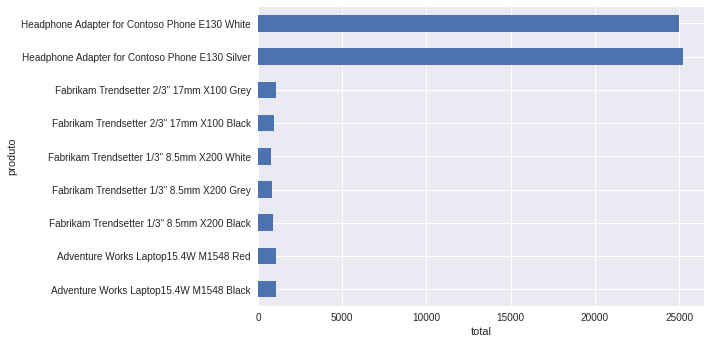

In [26]:
df.groupby(df.produto)['quantidade'].sum().sort_index().plot.barh()
plt.xlabel('total')
plt.ylabel('produto');

*Representação da quatidade de produtos vendidos em cada mês*

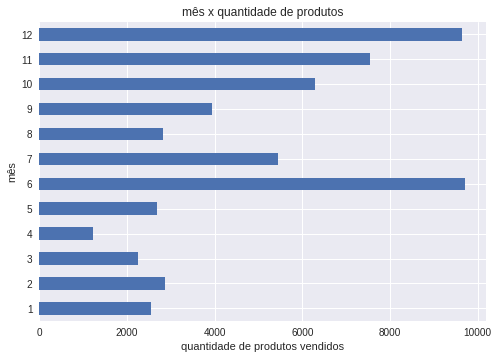

In [27]:
df.groupby(df.data_venda.dt.month)['quantidade'].sum().plot.barh(title='mês x quantidade de produtos')
plt.xlabel('quantidade de produtos vendidos')
plt.ylabel('mês');

*Representação do lucro a cada mês, gráfico em linha*

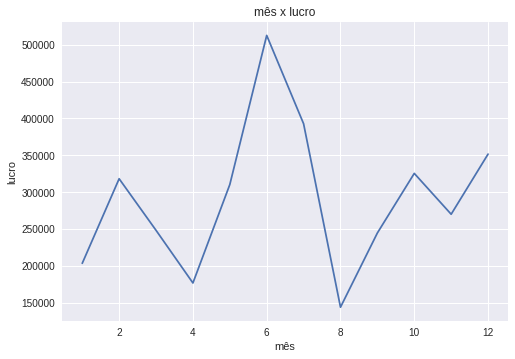

In [28]:
df.groupby(df.data_venda.dt.month)['lucro'].sum().plot(title='mês x lucro')
plt.xlabel('mês')
plt.ylabel('lucro');

Representação da marca que mais lucrou

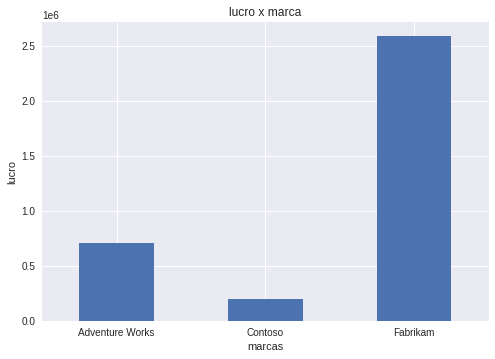

In [29]:
df.groupby('marca')['lucro'].sum().plot.bar(title='lucro x marca');
plt.xlabel('marcas')
plt.ylabel('lucro')
plt.xticks(rotation='horizontal');

In [30]:
df.tempo_envio.describe()

count    904.000000
mean       8.543142
std        3.056920
min        4.000000
25%        6.000000
50%        9.000000
75%       11.000000
max       20.000000
Name: tempo_envio, dtype: float64

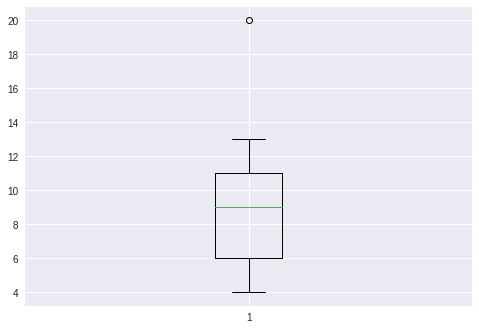

In [31]:
plt.boxplot(df.tempo_envio);

# Manipulando os datasets das capitais

In [239]:
df_fortaleza = pd.read_excel('/content/drive/MyDrive/Datasets/Fortaleza.xlsx')
df_aracaju = pd.read_excel('/content/drive/MyDrive/Datasets/Aracaju.xlsx')
df_recife = pd.read_excel('/content/drive/MyDrive/Datasets/Recife.xlsx')
df_salvador = pd.read_excel('/content/drive/MyDrive/Datasets/Salvador.xlsx')
df_natal = pd.read_excel('/content/drive/MyDrive/Datasets/Natal.xlsx')

*Já que os datasets são semelhantes, faço a concateção destes em un único dataframe*

In [240]:
df_all_stories = pd.concat([df_fortaleza, df_aracaju, df_recife, df_salvador, df_natal])

*Renomeando as colunas*

In [288]:
df_all_stories.rename(columns={'Cidade':'cidade', 'Data':'data', 'Vendas':'vendas', 'LojaID':'id_loja','Qtde':'qtde'}, inplace=True)

In [289]:
df_all_stories

,cidade,data,vendas,id_loja,qtde
0,Fortaleza,2019-01-01,45.27,1002,2
1,Fortaleza,2019-01-01,115.61,1002,3
2,Fortaleza,2019-02-10,35.33,1004,3
3,Fortaleza,2019-02-10,20.95,1004,6
4,Fortaleza,2019-01-01,14.25,1004,6
...,...,...,...,...,...
235,Natal,2019-01-03,41.84,1034,1
236,Natal,2019-01-03,126.29,1035,3
237,Natal,2019-01-03,38.06,1036,3
238,Natal,2019-01-03,139.64,1035,1


*Conferindo a quantidade de linhas e colunas*

In [243]:
df_all_stories.shape

(894, 5)

Obtendo as capitais e os id_lojas (código de cada loja)

In [244]:
df_all_stories.groupby('cidade')['id_loja'].unique()

cidade
Aracaju                          [1520, 1522, 1521, 1523]
Fortaleza    [1002, 1004, 1003, 1005, 981, 982, 983, 980]
Natal             [853, 852, 854, 1036, 1035, 1037, 1034]
Recife                               [981, 983, 980, 982]
Salvador                         [1037, 1034, 1035, 1036]
Name: id_loja, dtype: object

*Filtrando a cidade através do id_loja*

In [290]:
filtro_id_loja = df_all_stories['id_loja'] == 1004
df_all_stories.loc[filtro_id_loja]

,cidade,data,vendas,id_loja,qtde
2,Fortaleza,2019-02-10,35.33,1004,3
3,Fortaleza,2019-02-10,20.95,1004,6
4,Fortaleza,2019-01-01,14.25,1004,6
12,Fortaleza,2019-01-01,80.73,1004,2
17,Fortaleza,2019-01-01,166.80,1004,1
21,Fortaleza,2019-01-01,40.63,1004,3
23,Fortaleza,2019-01-01,85.90,1004,5
25,Fortaleza,2019-01-01,80.31,1004,4
28,Fortaleza,2019-01-01,34.88,1004,3
32,Fortaleza,2019-01-01,43.33,1004,4


*Filtrando as cidades pela quantidade de vendas*

In [291]:
filtro_qtd = df_all_stories.qtde < 4
df_all_stories.loc[filtro_qtd]

,cidade,data,vendas,id_loja,qtde
0,Fortaleza,2019-01-01,45.27,1002,2
1,Fortaleza,2019-01-01,115.61,1002,3
2,Fortaleza,2019-02-10,35.33,1004,3
7,Fortaleza,2019-02-11,35.50,1003,2
8,Fortaleza,2019-02-11,37.49,1005,1
...,...,...,...,...,...
235,Natal,2019-01-03,41.84,1034,1
236,Natal,2019-01-03,126.29,1035,3
237,Natal,2019-01-03,38.06,1036,3
238,Natal,2019-01-03,139.64,1035,1


*Retornando os dados de uma cidade específica*

In [292]:
df_all_stories.loc[df_all_stories.cidade == 'Fortaleza']

,cidade,data,vendas,id_loja,qtde
0,Fortaleza,2019-01-01,45.27,1002,2
1,Fortaleza,2019-01-01,115.61,1002,3
2,Fortaleza,2019-02-10,35.33,1004,3
3,Fortaleza,2019-02-10,20.95,1004,6
4,Fortaleza,2019-01-01,14.25,1004,6
...,...,...,...,...,...
137,Fortaleza,2019-03-02,51.99,983,3
138,Fortaleza,2019-03-02,150.38,983,6
139,Fortaleza,2019-03-02,141.16,980,7
140,Fortaleza,2019-03-02,166.89,983,5


*Retornando os dados da cidade, agora do jeito "pythônico"*

In [293]:
df_all_stories.loc[lambda df: df.cidade == 'Fortaleza']

,cidade,data,vendas,id_loja,qtde
0,Fortaleza,2019-01-01,45.27,1002,2
1,Fortaleza,2019-01-01,115.61,1002,3
2,Fortaleza,2019-02-10,35.33,1004,3
3,Fortaleza,2019-02-10,20.95,1004,6
4,Fortaleza,2019-01-01,14.25,1004,6
...,...,...,...,...,...
137,Fortaleza,2019-03-02,51.99,983,3
138,Fortaleza,2019-03-02,150.38,983,6
139,Fortaleza,2019-03-02,141.16,980,7
140,Fortaleza,2019-03-02,166.89,983,5


*Retornando os dados do indice 0 ao 19*

In [294]:

df_all_stories.iloc[0:20]

,cidade,data,vendas,id_loja,qtde
0,Fortaleza,2019-01-01,45.27,1002,2
1,Fortaleza,2019-01-01,115.61,1002,3
2,Fortaleza,2019-02-10,35.33,1004,3
3,Fortaleza,2019-02-10,20.95,1004,6
4,Fortaleza,2019-01-01,14.25,1004,6
5,Fortaleza,2019-01-01,37.30,1002,5
6,Fortaleza,2019-01-01,38.40,1003,4
7,Fortaleza,2019-02-11,35.50,1003,2
8,Fortaleza,2019-02-11,37.49,1005,1
9,Fortaleza,2019-01-01,11.17,1002,6


In [295]:
df_all_stories['vendas'].describe()

count    894.000000
mean     122.611801
std      166.818723
min        3.010000
25%       22.380000
50%       44.000000
75%      160.925000
max      886.000000
Name: vendas, dtype: float64

In [299]:
df_all_stories.groupby('cidade')['qtde'].sum()

cidade
Aracaju      674
Fortaleza    550
Natal        549
Recife       667
Salvador     476
Name: qtde, dtype: int64

Obtendo o valor total das vendas de cada loja agrupada por id_loja

In [415]:
df_all_stories.groupby('id_loja')['vendas'].sum().reset_index()

,id_loja,vendas
0,852,16304.00
1,853,15121.00
2,854,15360.00
3,980,2823.31
4,981,2531.25
5,982,3296.52
6,983,5010.18
7,1002,2098.04
8,1003,1635.94
9,1004,1561.18


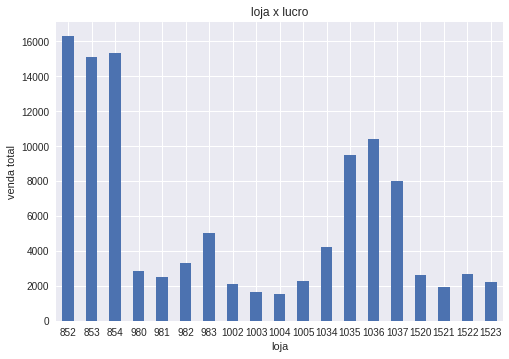

In [422]:
df_all_stories.groupby('id_loja')['vendas'].sum().plot.bar(title='loja x lucro')
plt.xticks(rotation='horizontal')
plt.xlabel('loja')
plt.ylabel('venda total');